<a href="https://colab.research.google.com/github/fdeloscogna/Estimating_pi/blob/main/Estimating_pi_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Probability Project 1: estimating π**

In this notebook, $\pi$ is estimated by using Monte Carlo simulation. The existstence of the constant called $\pi$ is commonly been taken for granted and is usually computed by using the area of the circle formula $\pi$*$r^2$. Instead, the project's aim is show how to get a precise value of $\pi$ by using simulations tools.

The french mathematician Laplace proposed to estimate the value of $\pi$ using stochastic simulation. The following notebook writte in Python aims to recall the scientist's experiment by considering a square which sides are of length 1 and inscribe a circle in it, so that the radius, $r$, of the circle which length is 1/2.
  
Since locations of the points needles are truly random, we can write the $\pi$ estimator considered for the following project:

$$\text{π̂} = \frac{\text{4 * points in circle}}{\text{points in square}}$$

Hence goal's of the project is to figure out at which amount of lambda the simulation reach a good approximation of $\pi$'s value close to 3.14.

In [ ]:
####################################
#Import fundamental packages
####################################

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as mt
import seaborn as sns
import matplotlib.ticker as ticker
from prettytable import PrettyTable

####################################
#Section 1, points generation and parameters setting
####################################

'''
Generate Poisson process to produce random points within a discrete square region.
In the following section: "N", "U" and "V" points are randomly generated within a two-dimensional square domain.
Poisson has been considered since its complete randomness.
'''

def poisson_points(λ, T):
    #Define the distribution of the points on the squared domain, in this case it follow a Poisson process on the plane
    N = np.random.poisson(λ * T**2) #This line determines the generation of inputs by drawing samples from a Poisson distribution.
    '''
    N: eneration by drawing samples from a Poisson distribution with parameters (λ * T**2).
    λ: called here as λ represent the expected number of events occurring in a fixed-time interval.
    T: side length of the square.
    This first snippet answer to the project question that the number of points in Λ have distribution Poi(λ*T^2)
    '''
    U = np.random.uniform(0, T, N)
    '''
    Points are generated uniformly, where 0: Lower boundary, T: Upper boundary , N: as seen before is the number of points generated.
    U represent an array containing N random values that are uniformly distributed between 0 and T.
    These random values represent the coordinates of the points randomly placed within the square domain.
    '''
    V = np.random.uniform(0, T, N)
    return U, V


####################################
#Sub section 1.2, parameters setting
####################################

#M => Variable that represent the number of independent realizations of a Poisson proces
T = 1 #length of the square and given by the project
M = 90 #amount of simulations for each value of λ from 5^1 to 5^10

####################################
#Section 2, estimator function
####################################

'''
The following function estimator and compute an estimate of π based on the provided inputs.
Circle center which represent a list of tuple containing x and y coordinates of the center of the circle.
The circle_radius representing the radius of a quarter circle
Checking for empty U array, if it is, means that there are no points generated in the simulation and return np.nan, since there are no points to work with.
'''
def estimator(U, V, circle_center, circle_radius):
    if len(U) == 0:
        return np.nan
    inside = np.sqrt((U - circle_center[0])**2 + (V - circle_center[1])**2) < circle_radius
    '''
    This part the code compute the Euclidean distance between each generated point and the center of the quarter circle as sowed by Simulation, Ross S., example 3a p.11
    Then it checks if the calculated distance is less than the circle's radius.
    For each point U[i], V[i], in the arrays u and v compute the euclidean distance between the point and the quarter circle
    Then check if this calculated distance is less than the circle radius. If it is less the "in circle" becomes TRUE
    If the distance is less than the radius, the point falls within the quarter circle, so the corresponding element in the inside array is True, otherwise it's False.
    This False/True is decided by the "< operator", if it is < will be True
    '''
    return 4 * np.sum(inside) / len(U)
    '''
    np.sum has been used becuse the algorithms take in account if the point is in the circle, count it.
    The last line represent the π estimator. It does this by dividing the count of points that fall within the quarter circle (sum of inside) by the total number of generated points (len(X)).
    The factor of 4 is used to account for the fact that we are estimating π based on a quarter circle within a square, so the result of this division is an estimation of π.
    '''

####################################
#Section 3, simulation on action
####################################

'''
The current function include the function defined before with the aim to estimate the value of π,
based on the generated random variables U and V.
'''
def find_pi(λ, T, M):
    pi_estimates = np.zeros(M) #This line creates an array called pi_estimates with M elements, initialized to zero. Store the values of π obtained from the simulation.
    for i in range(M): #Here a loop starts and will run M times. The loop will repeat the simulation M times to get "M different estimates of π".
        U, V = poisson_points(λ, T) #That line then generates two sets of N independent random variables (N for U and N for V) using a Poisson process.
        '''
        As previous mentioned, λ parameter is the rate of the Poisson process, and T represents the time interval over which the process is generated.
        This line calls the poisson_points function to generate two sets of random points, represented by the arrays U and V.
        '''
        pi_estimates[i] = estimator(U, V, [1/2, 1/2], 1/2) # since Γ is the circle with center with 1/2, 1/2 and the last 1/2 is the radius
        '''
        The [1/2, 1/2] represents the center of a unit square (a square with sides of length 1), and 1/2 represents the radius of a circle with the same center as the square and half the side length.
        The estimator function likely uses some geometric calculations to compute an estimate of π based on the number of points that fall inside the circle compared to the total number of points generated inside the square.
        Here, the estimator function is called with the generated X and Y points, along with the center [1/2, 1/2] and radius 1/2 parameters.
        The estimated values are then stored in the pi_estimates array at index called for simplicity as i.
        '''
    return pi_estimates

#Finally, the function returns the arrays U and V, which together represent the random points distributed within the square domain.
#In formal terms, as seen in the paper, it gives us the Euclidean coordinates of N points of the Poisson process;

'''
#As seen from the project guidelines the k value is goes from 1 up to 10
#Lambda's density will be defined as values of 5^k as defined here and are 10 different
'''
lambdas = [5 ** k for k in range(1, 11)] # 5 to k-th with k 1,2,..,10

# Run the simulation for different values of lambda
'''
#Run with lambdas values including T, M index
#Where pi_estimates will be made by 10 arrays of M simulations, the variable that will hold the list of estimated π values.
'''
pi_estimates = [find_pi(λ, T, M) for λ in lambdas]

# Computation of the standard deviation of the pi estimates for each value of lambda
std_dev = [np.std(estimates) for estimates in pi_estimates]

* Problem 1, how the approximate value of π depends on λ

In [ ]:
#Which is the lambda's density?
print(f"The density of lambda amounts to: {lambdas}")

The density of lambda amounts to: [5, 25, 125, 625, 3125, 15625, 78125, 390625, 1953125, 9765625]


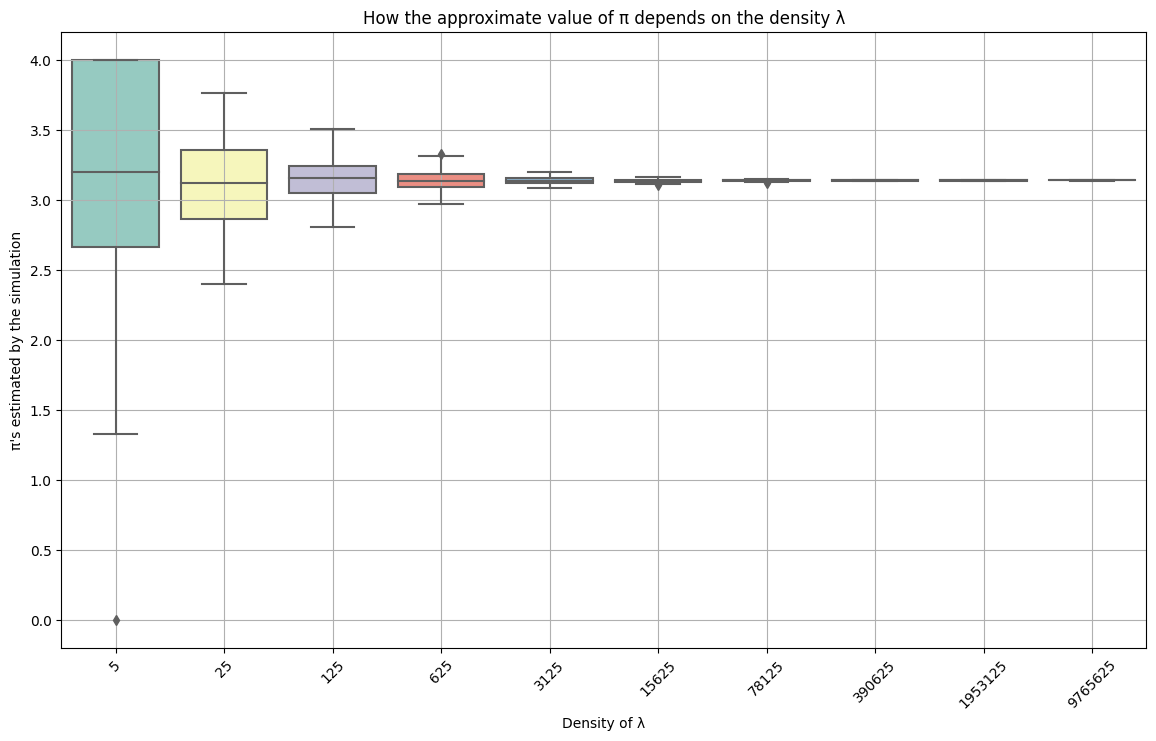

In [ ]:
#To draw the plot, simulations results are stored into a DataFrame with 2 columns: Lambda and Pi Estimate
results_df = pd.DataFrame({
    "Lambda": np.repeat(lambdas, M),  #by using numpy repeat original lambda values for M times
    "Pi Estimate": np.concatenate(pi_estimates)  #concatenating here all pi estimates
})
plt.figure(figsize=(14, 8))
#To repressent the relationship a boxplot has been selected
sns.boxplot(data=results_df, x="Lambda", y="Pi Estimate", palette="Set3")
plt.xlabel("Density of λ")
plt.ylabel("π's estimated by the simulation")
plt.title("How the approximate value of π depends on the density λ")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


• Problem 2, how the standard deviation depends on Lambda 𝛌

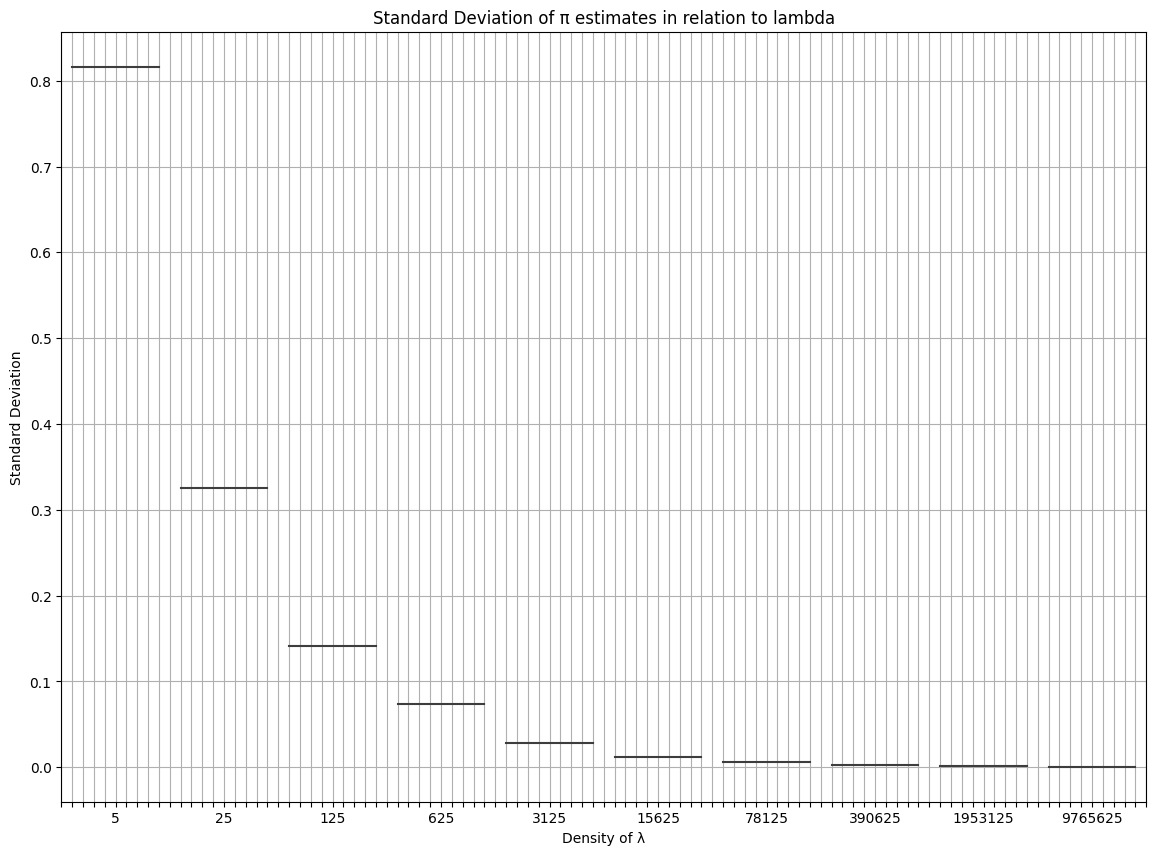

In [ ]:
#Plot of the relationship between standard deviation and density of lambda
plt.figure(figsize=(14, 10))
sns.violinplot(x=lambdas, y=std_dev, split=True, inner='quart')
plt.xlabel("Density of λ")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of π estimates in relation to lambda")
plt.grid(True)
ax = plt.gca()
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=100))
plt.show()
#K = 1 is the power of 5, at density 5 e.g. we observe a 0.8 of standard deviation, at K = 2, 5^2 => density of 125 instead 0.1 of standard deviation,

Further curiosity about the absolute error

In [ ]:
results_df = pd.DataFrame(columns=["Simulation runs, M", "Value of Pi", "Absolute error", "% Error"])
for λ in lambdas:
    pi_estimates = find_pi(λ, T, M)

    for i, pi_estimate in enumerate(pi_estimates):
        absolute_error = abs(np.pi - pi_estimate) #The formula considered take the true value of pi Vs the estimated pi by the algorithm
        percent_error = (absolute_error / np.pi) * 100

        results_df = results_df.append({
            "Simulation runs, M": i + 1,
            "Value of Pi": pi_estimate,
            "Absolute error": absolute_error,
            "% Error": percent_error,
        }, ignore_index=True)

In [ ]:
table = PrettyTable()
table.field_names = results_df.columns
for _, row in results_df.iterrows():
    table.add_row(row)

print(table)

+--------------------+--------------------+------------------------+------------------------+
| Simulation runs, M |    Value of Pi     |     Absolute error     |        % Error         |
+--------------------+--------------------+------------------------+------------------------+
|        1.0         |        4.0         |   0.8584073464102069   |   27.32395447351627    |
|        2.0         | 1.1428571428571428 |   1.9987355107326503   |   63.62172729328107    |
|        3.0         | 2.857142857142857  |   0.2844497964469359   |    9.05431823320266    |
|        4.0         |        2.4         |   0.7415926535897932   |   23.60562731589024    |
|        5.0         |        2.5         |   0.6415926535897931   |   20.42252845405233    |
|        6.0         |        4.0         |   0.8584073464102069   |   27.32395447351627    |
|        7.0         |        4.0         |   0.8584073464102069   |   27.32395447351627    |
|        8.0         | 3.4285714285714284 |  0.2869787749816

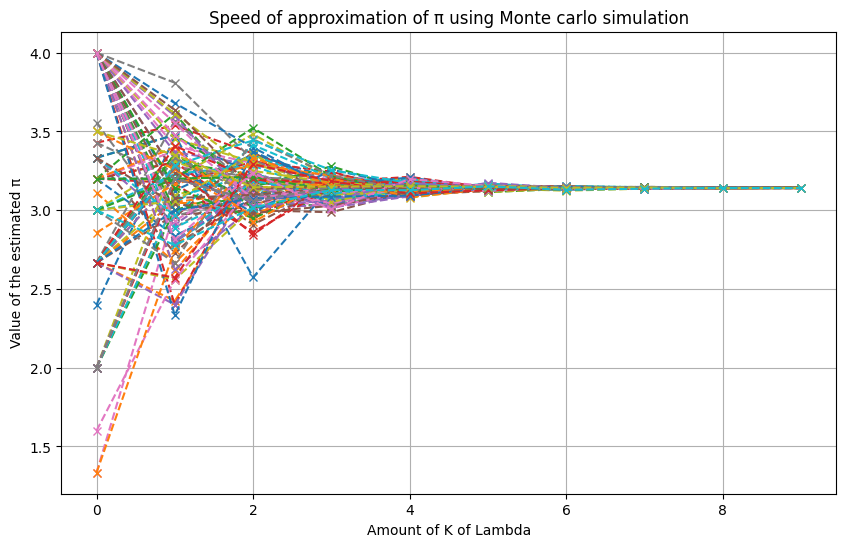

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(pi_estimates, marker="x", linestyle="--")
plt.xlabel("Amount of K of Lambda")
plt.ylabel("Value of the estimated π")
plt.title("Speed of approximation of π using Monte carlo simulation")
plt.grid(True)
plt.show()

#test section and trial section


In [ ]:
# Define values of k
k_values = list(range(1, 11))

# Calculate corresponding λ values
lambda_values = [5 ** k for k in k_values]

# Create a 2D array to store π estimates for each λ
pi_estimates_2d = []

# Perform simulations for different values of λ
for lambda_ in lambda_values:
    pi_estimates = run_simulation(lambda_, T, M)
    pi_estimates_2d.append(pi_estimates)

# Plot the relationship between λ and π estimates
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.plot([lambda_values[i]] * M, pi_estimates_2d[i], marker="x", linestyle="--", label=f"k = {k}")

plt.xlabel("λ (Lambda)")
plt.ylabel("Value of the estimated π")
plt.title("Approximation of π using Poisson process")
plt.legend()
plt.grid(True)
plt.show()

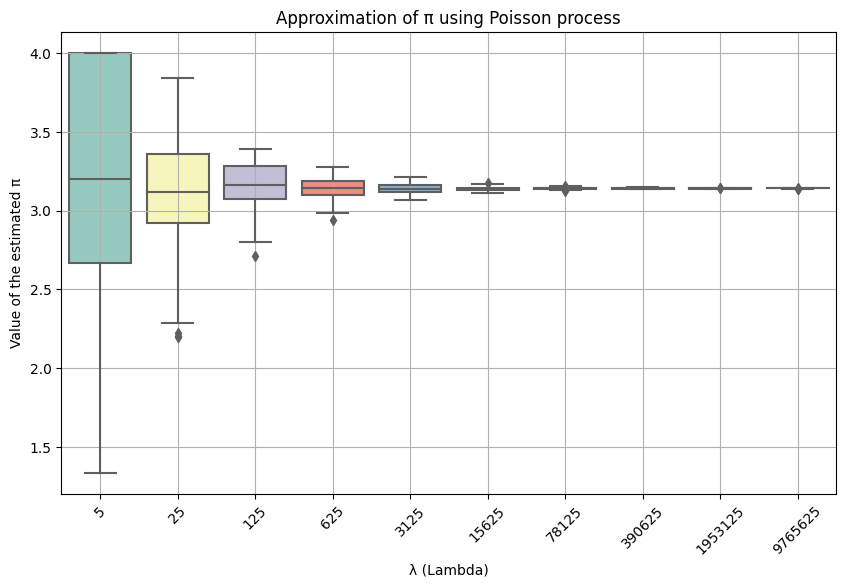

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Previous code for simulations and data collection)

# Combine the simulation results into a DataFrame
results_df = pd.DataFrame({
    "Lambda": np.repeat(lambda_values, M),  # Repeat lambda values for M times
    "Pi Estimate": np.concatenate(pi_estimates_2d)  # Concatenate all pi estimates
})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=results_df, x="Lambda", y="Pi Estimate", palette="Set3")
plt.xlabel("λ (Lambda)")
plt.ylabel("Value of the estimated π")
plt.title("Approximation of π using Poisson process")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [ ]:
#Ogni linea rappresenta il numero di "M", quindi se setto M=1 avrò 1 sola linea.
import math as mt

plt.plot(pi_estimates)
plt.axhline(y=mt.pi, color='r', linestyle='-')
plt.ylabel("Value of pi")
plt.title("Standard Deviation and k lambda of Pi Estimates")
plt.xlabel("Numbers of K lambda")

plt.show()
#You can see that the variation along each curve (which is what your first method uses) is smaller than the variation between the curves.
#That's because points on the same curve are correlated: the estimates at 800 and 900 throws share the first 800 throws and so have a correlation of 800/900, or nearly 0.9.

#The bootstrap idea is a slightly more general version of this, where the estimate_sd
#is based on empirical standard deviations over intervals of more than one time point, so it would work for, eg, autocorrelation estimates as well as for means.

In [ ]:
import matplotlib.pyplot as plt

# Create a violin plot
plt.violinplot(std_dev, )
plt.xlabel("Density (λ)")
plt.ylabel("Standard Deviation of π Estimates")
plt.title("Standard Deviation of π Estimates vs. N of lambda")
plt.grid(True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math as mt


def generate_poisson_process(lambda_, T):
    N = np.random.poisson(lambda_ * T**2) #T**2 for a squared domain in our case could just be T
    X = np.random.uniform(0, T, N) #points are generated uniformly
    Y = np.random.uniform(0, T, N)
    return X, Y

def estimate_pi(X, Y, circle_center, circle_radius):
    if len(X) == 0:
        return np.nan #if N= 0 we stop the algorithm x,y same lenght
    in_circle = np.sqrt((X - circle_center[0])**2 + (Y - circle_center[1])**2) < circle_radius #eukledian formula to see if poits are in circle or not
    return 4 * np.sum(in_circle) / len(X)

def run_simulation(lambda_, T, M):
    pi_estimates = np.zeros(M)
    for i in range(M):
        X, Y = generate_poisson_process(lambda_, T) #generate 2N independet random Variables
        pi_estimates[i] = estimate_pi(X, Y, [1/2, 1/2], 1/2) #use generated parameters to estimate the pi M times #1/2 cricle center and radius
    return pi_estimates

# Parameters to choose
T = 1 #length of the square
M = 150 #numebers of simulations
lambdas = [5 ** k for k in range(1, 11)] # 5 to k-th with k 1,2,..,10

# Run the simulation for different values of lambda
pi_estimates = [run_simulation(lambda_, T, M) for lambda_ in lambdas]

# Plot the histograms of the pi estimates
fig, ax = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)
for i, (lambda_, estimates) in enumerate(zip(lambdas, pi_estimates)):
    row, col = i // 2, i % 2
    ax[row, col].hist(estimates, bins=int(np.sqrt(len(estimates))))
    ax[row, col].set_title(f"lambda = {lambda_}")
    ax[row, col].axvline(np.pi, color='red', linestyle='--')
    # Zoom out on the histogram
    ax[row, col].set_xlim(left=1.5, right=5)

# Plot the standard deviation of the pi estimates for each value of lambda
std_dev = [np.std(estimates) for estimates in pi_estimates]
plt.figure()
plt.plot(lambdas, std_dev, marker='o')
plt.xlabel("lambda")
plt.ylabel("Standard Deviation")
plt.title("Standard Deviation of Pi Estimates")
plt.show()



In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(10,10), sharex=True, sharey=True)
for i, (lambda_, estimates) in enumerate(zip(lambdas, pi_estimates)):
    row, col = i // 2, i % 2
    ax[row, col].hist(estimates, bins=int(np.sqrt(len(estimates))))
    ax[row, col].set_title(f"lambda = {lambda_}")
    ax[row, col].axvline(np.pi, color='red', linestyle='--')
    # Zoom out on the histogram
    ax[row, col].set_xlim(left=1.5, right=5)


plt.tight_layout()
plt.suptitle("Approximation of π using Poisson process\nStandard Deviations for Different Densities",
             fontsize=16)
plt.subplots_adjust(top=0.9)

plt.show()

In [ ]:
from scipy.interpolate import make_interp_spline
# Smooth curves using smoothing spline
spline = make_interp_spline(lambdas, std_dev)
densities_smooth = np.linspace(min(lambdas), max(lambdas))
standard_deviations_smooth = spline(densities_smooth)

# Line plot with smooth curves
plt.figure(figsize=(10, 6))
plt.plot(lambdas, std_dev, color='b', label='Smooth Curve')
plt.scatter(lambdas, std_dev, marker='o', color='r', label='Data Points')
plt.xlabel("Density (λ)")
plt.ylabel("Standard Deviation of π Estimates")
plt.title("Standard Deviation of π Estimates vs. N of lambda")
plt.legend()
plt.grid(True)
plt.show()

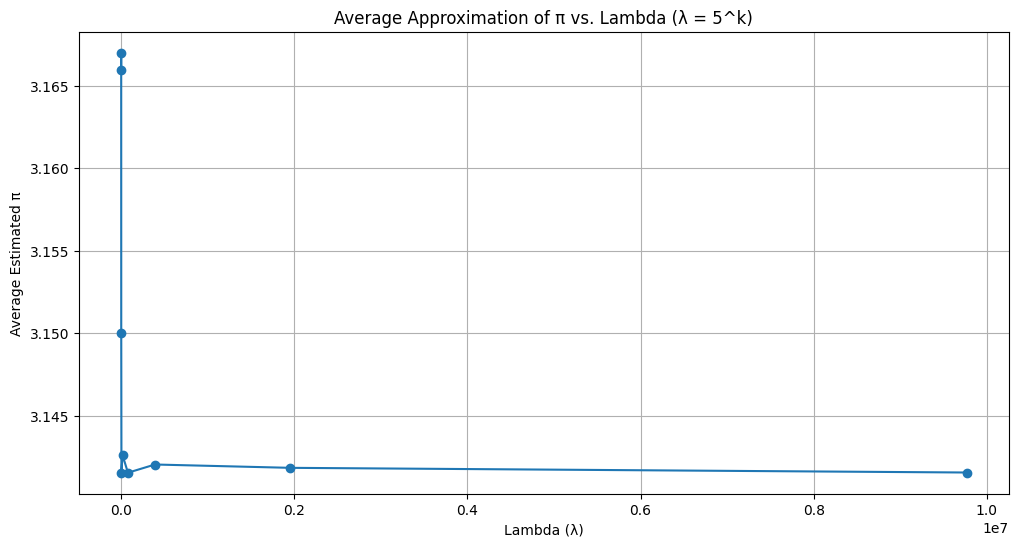

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters to choose
T = 1  # Length of the square
M = 90  # Number of simulations

# Generate a list of lambdas in the form λ = 5^k for k in {1, 2, ..., 10}
lambdas = [5**k for k in range(1, 11)]

# Create lists to store the average π estimates for each λ
average_pi_estimates = []

# Perform simulations for different values of lambda
for lambda_ in lambdas:
    pi_estimates = run_simulation(lambda_, T, M)
    average_pi_estimate = np.mean(pi_estimates)

    average_pi_estimates.append(average_pi_estimate)

# Plot the average π estimates vs. lambda
plt.figure(figsize=(12, 6))
plt.plot(lambdas, average_pi_estimates, marker="o", linestyle="-")
plt.xlabel("Lambda (λ)")
plt.ylabel("Average Estimated π")
plt.title("Average Approximation of π vs. Lambda (λ = 5^k)")
plt.grid(True)
plt.show()

In [ ]:
# Define values of k
k_values = list(range(1, 11))

# Calculate corresponding λ values
lambda_values = [5 ** k for k in k_values]

# Create a 2D array to store π estimates for each λ
pi_estimates_2d = []

# Perform simulations for different values of λ
for lambda_ in lambda_values:
    pi_estimates = run_simulation(lambda_, T, M)
    pi_estimates_2d.append(pi_estimates)

# Plot the relationship between λ and π estimates
plt.figure(figsize=(10, 6))
for i, k in enumerate(k_values):
    plt.plot([lambda_values[i]] * M, pi_estimates_2d[i], marker="x", linestyle="--", label=f"k = {k}")

plt.xticks(lambda_values)  # Set the x-axis ticks to match lambda values
plt.xlabel("λ (Lambda)")
plt.ylabel("Value of the estimated π")
plt.title("Approximation of π using Poisson process")
plt.legend()
plt.grid(True)
plt.show()

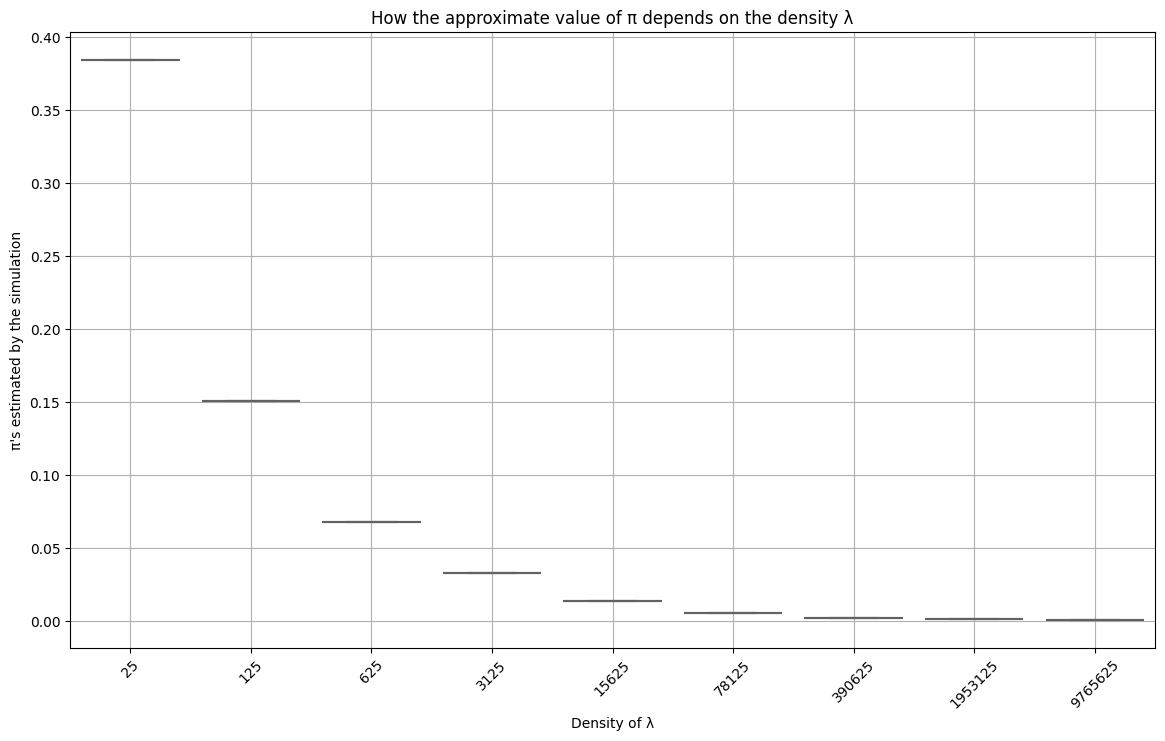

In [ ]:
#To draw the plot, simulations results are stored into a DataFrame with 2 columns: Lambda and Pi Estimate
'''
results = pd.DataFrame({
    "Lambda": np.repeat(lambdas, M),  #by using numpy repeat original lambda values for M times
    "std": np.concatenate(std_dev)  #concatenating here all pi estimates
})
'''

filtered_lambdas = [l for l, s in zip(lambdas, std_dev) if not np.isnan(s)]
filtered_std_dev = [s for s in std_dev if not np.isnan(s)]

plt.figure(figsize=(14, 8))
#To repressent the relationship a boxplot has been selected
sns.boxplot(x=filtered_lambdas, y=filtered_std_dev, palette="Set3")
plt.xlabel("Density of λ")
plt.ylabel("π's estimated by the simulation")
plt.title("How the approximate value of π depends on the density λ")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

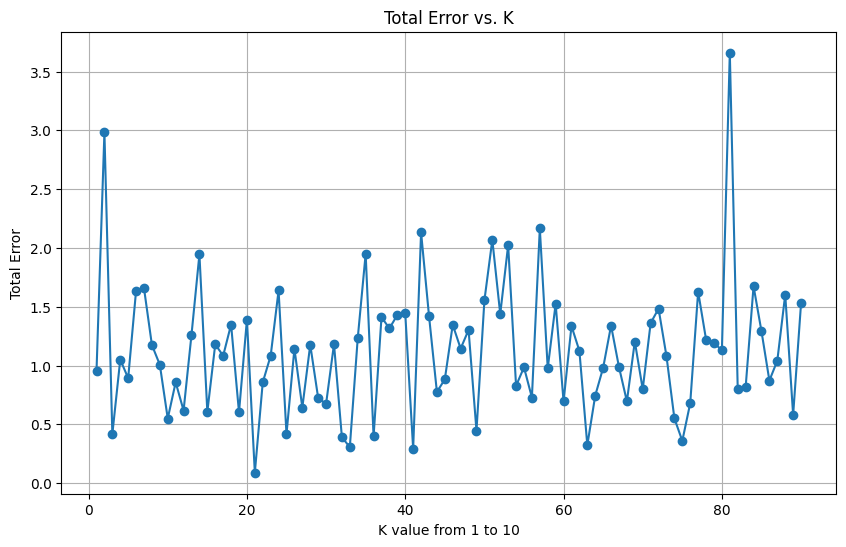

In [ ]:
# Initialize lists to store total errors and corresponding values of M
total_errors = []
M_values = []

# Group the DataFrame by the number of simulations (M) and calculate total error
for M, group in results_df.groupby("Simulation runs, M"):
    total_error = group["Absolute error"].sum()
    total_errors.append(total_error)
    M_values.append(M)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(M_values, total_errors, marker="o", linestyle="-")
plt.xlabel("K value from 1 to 10")
plt.ylabel("Total Error")
plt.title("Total Error vs. K")
plt.grid(True)
plt.show()